# Chapter 1: Overview

In [1]:
#Retrieving datasets from Quandl
import quandl 

api = 'DxswD4b7N-71v3B7DaXk'
quandl.ApiConfig.api_key = api
df = quandl.get('EURONEXT/ABN')

In [2]:
df.head()

,Open,High,Low,Last,Volume,Turnover
Date,,,,,,
2015-11-20,18.18,18.43,18.000,18.35,38392898.0,7.003281e+08
2015-11-23,18.45,18.70,18.215,18.61,3352514.0,6.186446e+07
2015-11-24,18.70,18.80,18.370,18.80,4871901.0,8.994087e+07
2015-11-25,18.85,19.50,18.770,19.45,4802607.0,9.153862e+07
2015-11-26,19.48,19.67,19.410,19.43,1648481.0,3.220713e+07


In [3]:
df.tail()

,Open,High,Low,Last,Volume,Turnover
Date,,,,,,
2020-08-14,8.476,8.530,8.080,8.230,5276115.0,43323289.0
2020-08-17,8.250,8.310,8.010,8.010,3640785.0,29471140.0
2020-08-18,7.932,8.150,7.850,7.962,3280109.0,26249556.0
2020-08-19,7.920,8.112,7.842,8.112,2610498.0,20800761.0
2020-08-20,7.924,7.996,7.806,7.816,3137395.0,24705702.0


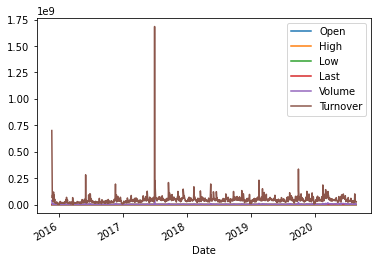

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

df.plot();

In [7]:
prices = df['Last']
volumes = df['Volume']

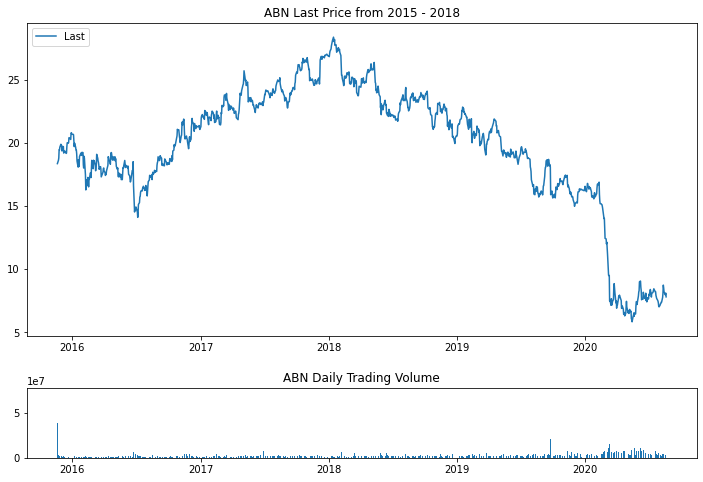

In [14]:
#Top plot consisting of daily closing prices 
top = plt.subplot2grid((4, 4), (0, 0), rowspan=3, colspan=4)
top.plot(prices.index, prices, label='Last')
plt.title('ABN Last Price from 2015 - 2018')
plt.legend(loc=2)

#The bottom plot consitsting of trading volume
bottom = plt.subplot2grid((4, 4), (3, 0), rowspan = 1, colspan = 4)
bottom.bar(volumes.index, volumes)
plt.title('ABN Daily Trading Volume')

plt.gcf().set_size_inches(12, 8)
plt.subplots_adjust(hspace=0.75)

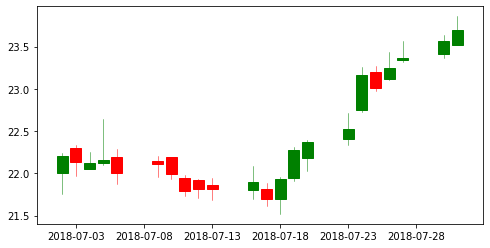

In [25]:
#Create candlestick graph
#import quandl
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

df_subset = quandl.get('EURONEXT/ABN',
                       start_date='2018-07-01',
                       end_date='2018-07-31')

df_subset['Date'] = df_subset.index.map(mdates.date2num)
df_ohlc = df_subset[['Date', 'Open', 'High', 'Low', 'Last']]

fig, ax = plt.subplots(figsize=(8,4))
formatter = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(formatter)
candlestick_ohlc(ax, df_ohlc.values, width=0.8, colorup='green', colordown='red')
plt.show()

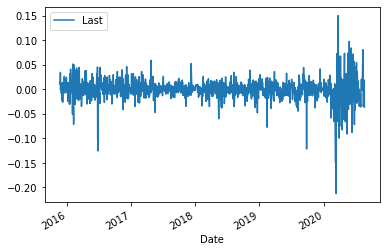

In [26]:
#Plotting returns 
#%matplotlib inline
#import quandl

#set api
df = quandl.get('EURONEXT/ABN.4')
daily_changes = df.pct_change(periods=1)
daily_changes.plot();

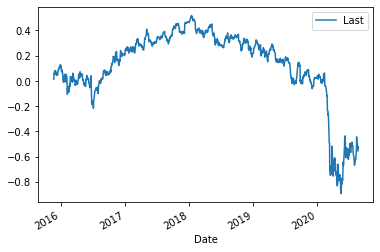

In [27]:
#Plotting cumulative returns 
df_cumsum = daily_changes.cumsum()
df_cumsum.plot();

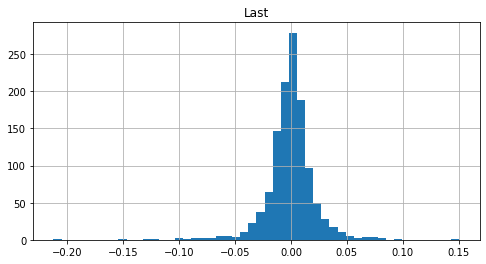

In [29]:
#Plotting a histogram of returns 
daily_changes.hist(bins=50, figsize=(8,4));

In [30]:
#Use describe() to summarize the central tendency, dispersion and shape 
daily_changes.describe()

,Last
count,1209.000000
mean,-0.000458
std,0.022042
min,-0.212453
25%,-0.009306
50%,0.000245
75%,0.009213
max,0.150552


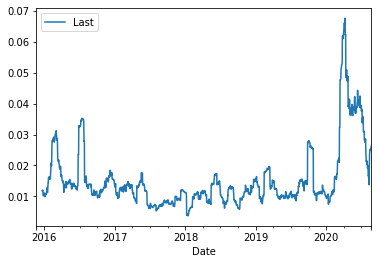

In [33]:
df_filled = df.asfreq('D', method='ffill')
df_returns = df_filled.pct_change()
df_std = df_returns.rolling(window=30, min_periods=30).std()
df_std.plot();

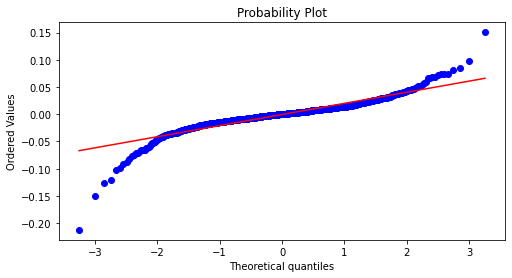

In [37]:
from scipy import stats
from scipy.stats import probplot

df = quandl.get('EURONEXT/ABN.4')
daily_changes = df.pct_change(periods=1).dropna()

figure = plt.figure(figsize=(8, 4))
ax = figure.add_subplot(111)
probplot(daily_changes['Last'], dist='norm', plot=ax)
plt.show();

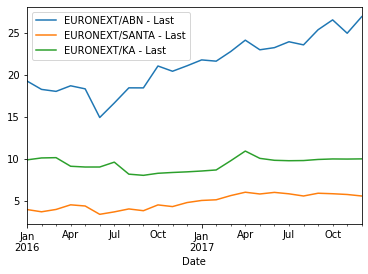

In [39]:
#importing multiple time series data
df = quandl.get(['EURONEXT/ABN.4', 
                 'EURONEXT/SANTA.4',
                 'EURONEXT/KA.4'],
               collapse='monthly',
               start_date = '2016-01-01',
               end_date='2017-12-31')
df.plot();

In [42]:
#Get correlations using Pandas corr
df.pct_change().corr()

,EURONEXT/ABN - Last,EURONEXT/SANTA - Last,EURONEXT/KA - Last
EURONEXT/ABN - Last,1.000000,0.809824,0.096238
EURONEXT/SANTA - Last,0.809824,1.000000,0.058095
EURONEXT/KA - Last,0.096238,0.058095,1.000000


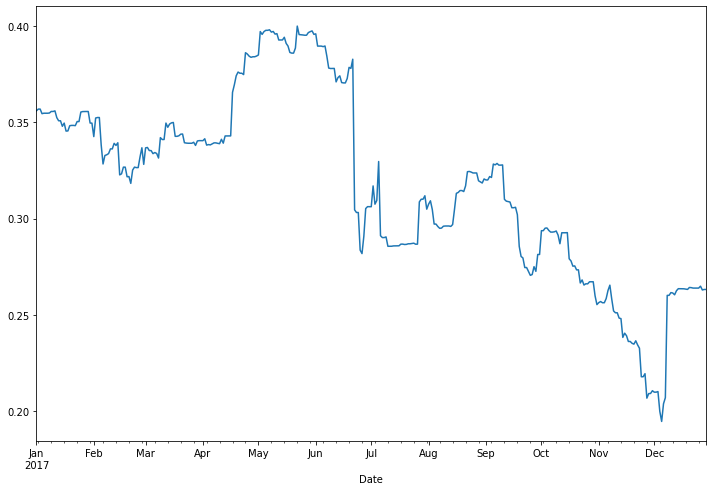

In [45]:
#Plotting correlations
df = quandl.get(['EURONEXT/ABN.4', 
                 'EURONEXT/SANTA.4',
                 'EURONEXT/KA.4'],
               collapse='daily',
               start_date = '2016-01-01',
               end_date='2017-12-31')
df_filled = df.asfreq('D', method='ffill')
daily_changes = df_filled.pct_change()
abn_returns = daily_changes['EURONEXT/ABN - Last']
santa_returns = daily_changes['EURONEXT/SANTA - Last']
window = int(len(df_filled.index)/2)
df_corrs = abn_returns.rolling(window=window, min_periods=window).corr(other=santa_returns).dropna()

df_corrs.plot(figsize=(12, 8));

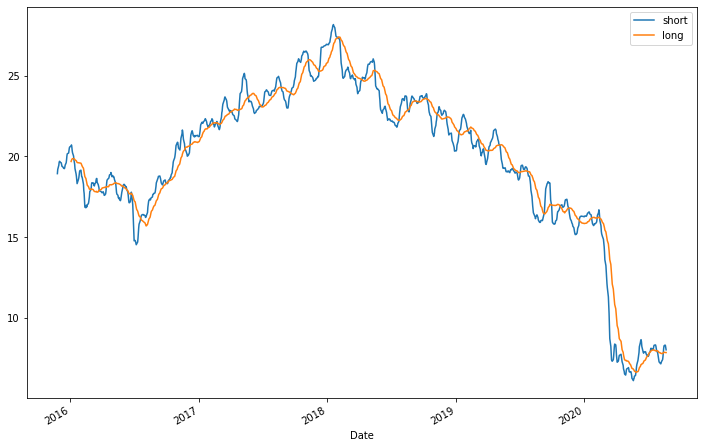

In [48]:
#Simple moving averages
#import quandl
import pandas as pd 

df = quandl.get('EURONEXT/ABN.4')

df_filled = df.asfreq('D', method='ffill')
df_last = df['Last']

series_short = df_last.rolling(window=5, min_periods=5).mean()
series_long = df_last.rolling(window=30, min_periods=30).mean()

df_sma = pd.DataFrame(columns=['short', 'long'])
df_sma['short'] = series_short
df_sma['long'] = series_long
df_sma.plot(figsize=(12, 8));

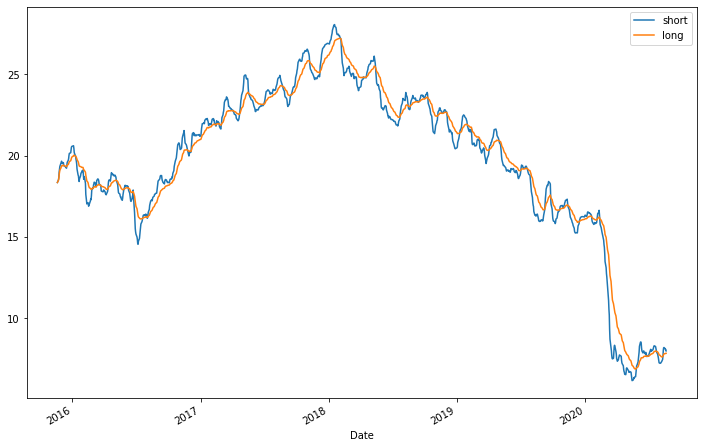

In [49]:
#Expontial moving averages
#import quandl
import pandas as pd 

df = quandl.get('EURONEXT/ABN.4')

df_filled = df.asfreq('D', method='ffill')
df_last = df['Last']

series_short = df_last.ewm(span=5).mean()
series_long = df_last.ewm(span=30).mean()

df_sma = pd.DataFrame(columns=['short', 'long'])
df_sma['short'] = series_short
df_sma['long'] = series_long
df_sma.plot(figsize=(12, 8));